In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data and show the first few rows

In [2]:
data = pd.read_csv('Cereals.csv')
data.head()

name mfr type  calories  protein  fat  sodium  fiber  \
0                  100%_Bran   N    C        70        4    1     130   10.0   
1          100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
4             Almond_Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0     6.0   280.0        25      3     1.0  0.33  68.402973  
1    8.0     8.0   135.0         0      3     1.0  1.00  33.983679  
2    7.0     5.0   320.0        25      3     1.0  0.33  59.425505  
3    8.0     0.0   330.0        25      3     1.0  0.50  93.704912  
4   14.0     8.0     NaN        25      3     1.0  0.75  34.384843

Use sklean to normailze the numerical fields.

In [3]:
from sklearn.preprocessing import normalize
data = data.dropna()

data_scaled = normalize(data[
    ['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups','rating']
])

data_scaled = pd.DataFrame(data_scaled, columns=['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups','rating'])

data_scaled.head()
# data = pd.merge(data,data_scaled, how='left')
# data.head()

calories   protein       fat    sodium     fiber     carbo    sugars  \
0  0.215316  0.012304  0.003076  0.399873  0.030759  0.015380  0.018456   
1  0.649058  0.016226  0.027044  0.081132  0.010818  0.043271  0.043271   
2  0.165342  0.009448  0.002362  0.614126  0.021258  0.016534  0.011810   
3  0.133302  0.010664  0.000000  0.373245  0.037324  0.021328  0.000000   
4  0.486522  0.008846  0.008846  0.796126  0.006634  0.046441  0.044229   

     potass  vitamins     shelf    weight      cups    rating  
0  0.861265  0.076899  0.009228  0.003076  0.001015  0.210404  
1  0.730190  0.000000  0.016226  0.005409  0.005409  0.183811  
2  0.755848  0.059051  0.007086  0.002362  0.000779  0.140364  
3  0.879791  0.066651  0.007998  0.002666  0.001333  0.249820  
4  0.309605  0.110573  0.004423  0.004423  0.003317  0.130518

We can visualize the dendrogram using the ward method to give us an idea what our model might look like.

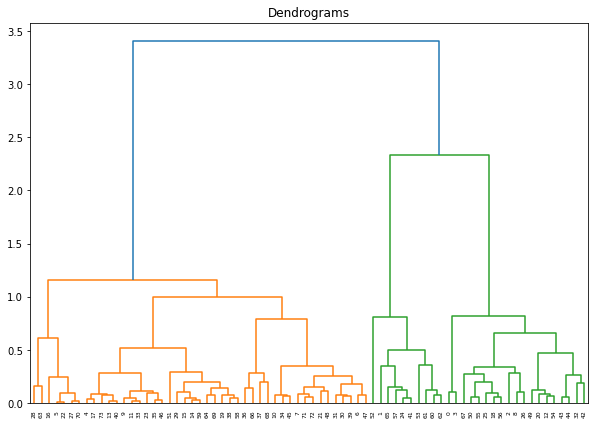

In [4]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

Using the convention of splitting the longest verical line, I've plotted a dashed line at 3. This shows our 2 categories for clustering.

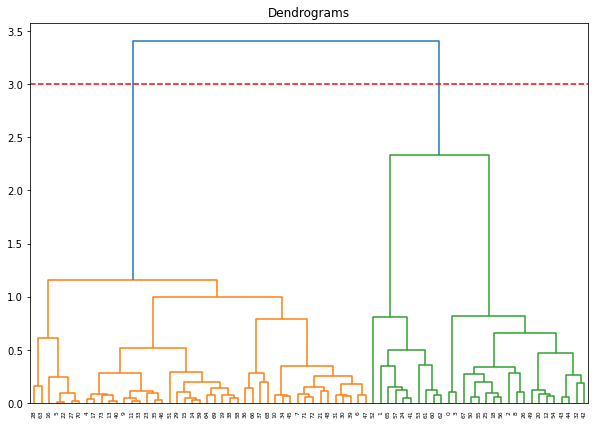

In [5]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=3, color='r', linestyle='--')

In [6]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
preds = cluster.fit_predict(data_scaled)

data_scaled['preds'] = preds

We can then plot some of the variables to see how the clusting worked. Here the variables "Calories" and "Protein" weren't very distinct

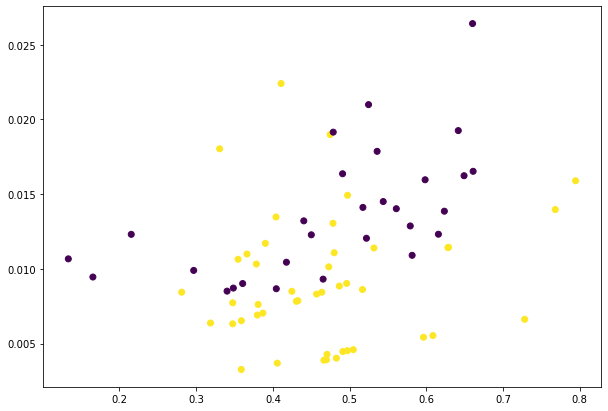

In [7]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['calories'], data_scaled['protein'], c=cluster.labels_) 

Using Seaborn I can plot all the scatter plots between all the varaibles. This provides a much clearer picture of the relationships in the data. From the plot below it appears that sodium and potasium were more important factors in the distincion between the cereal.

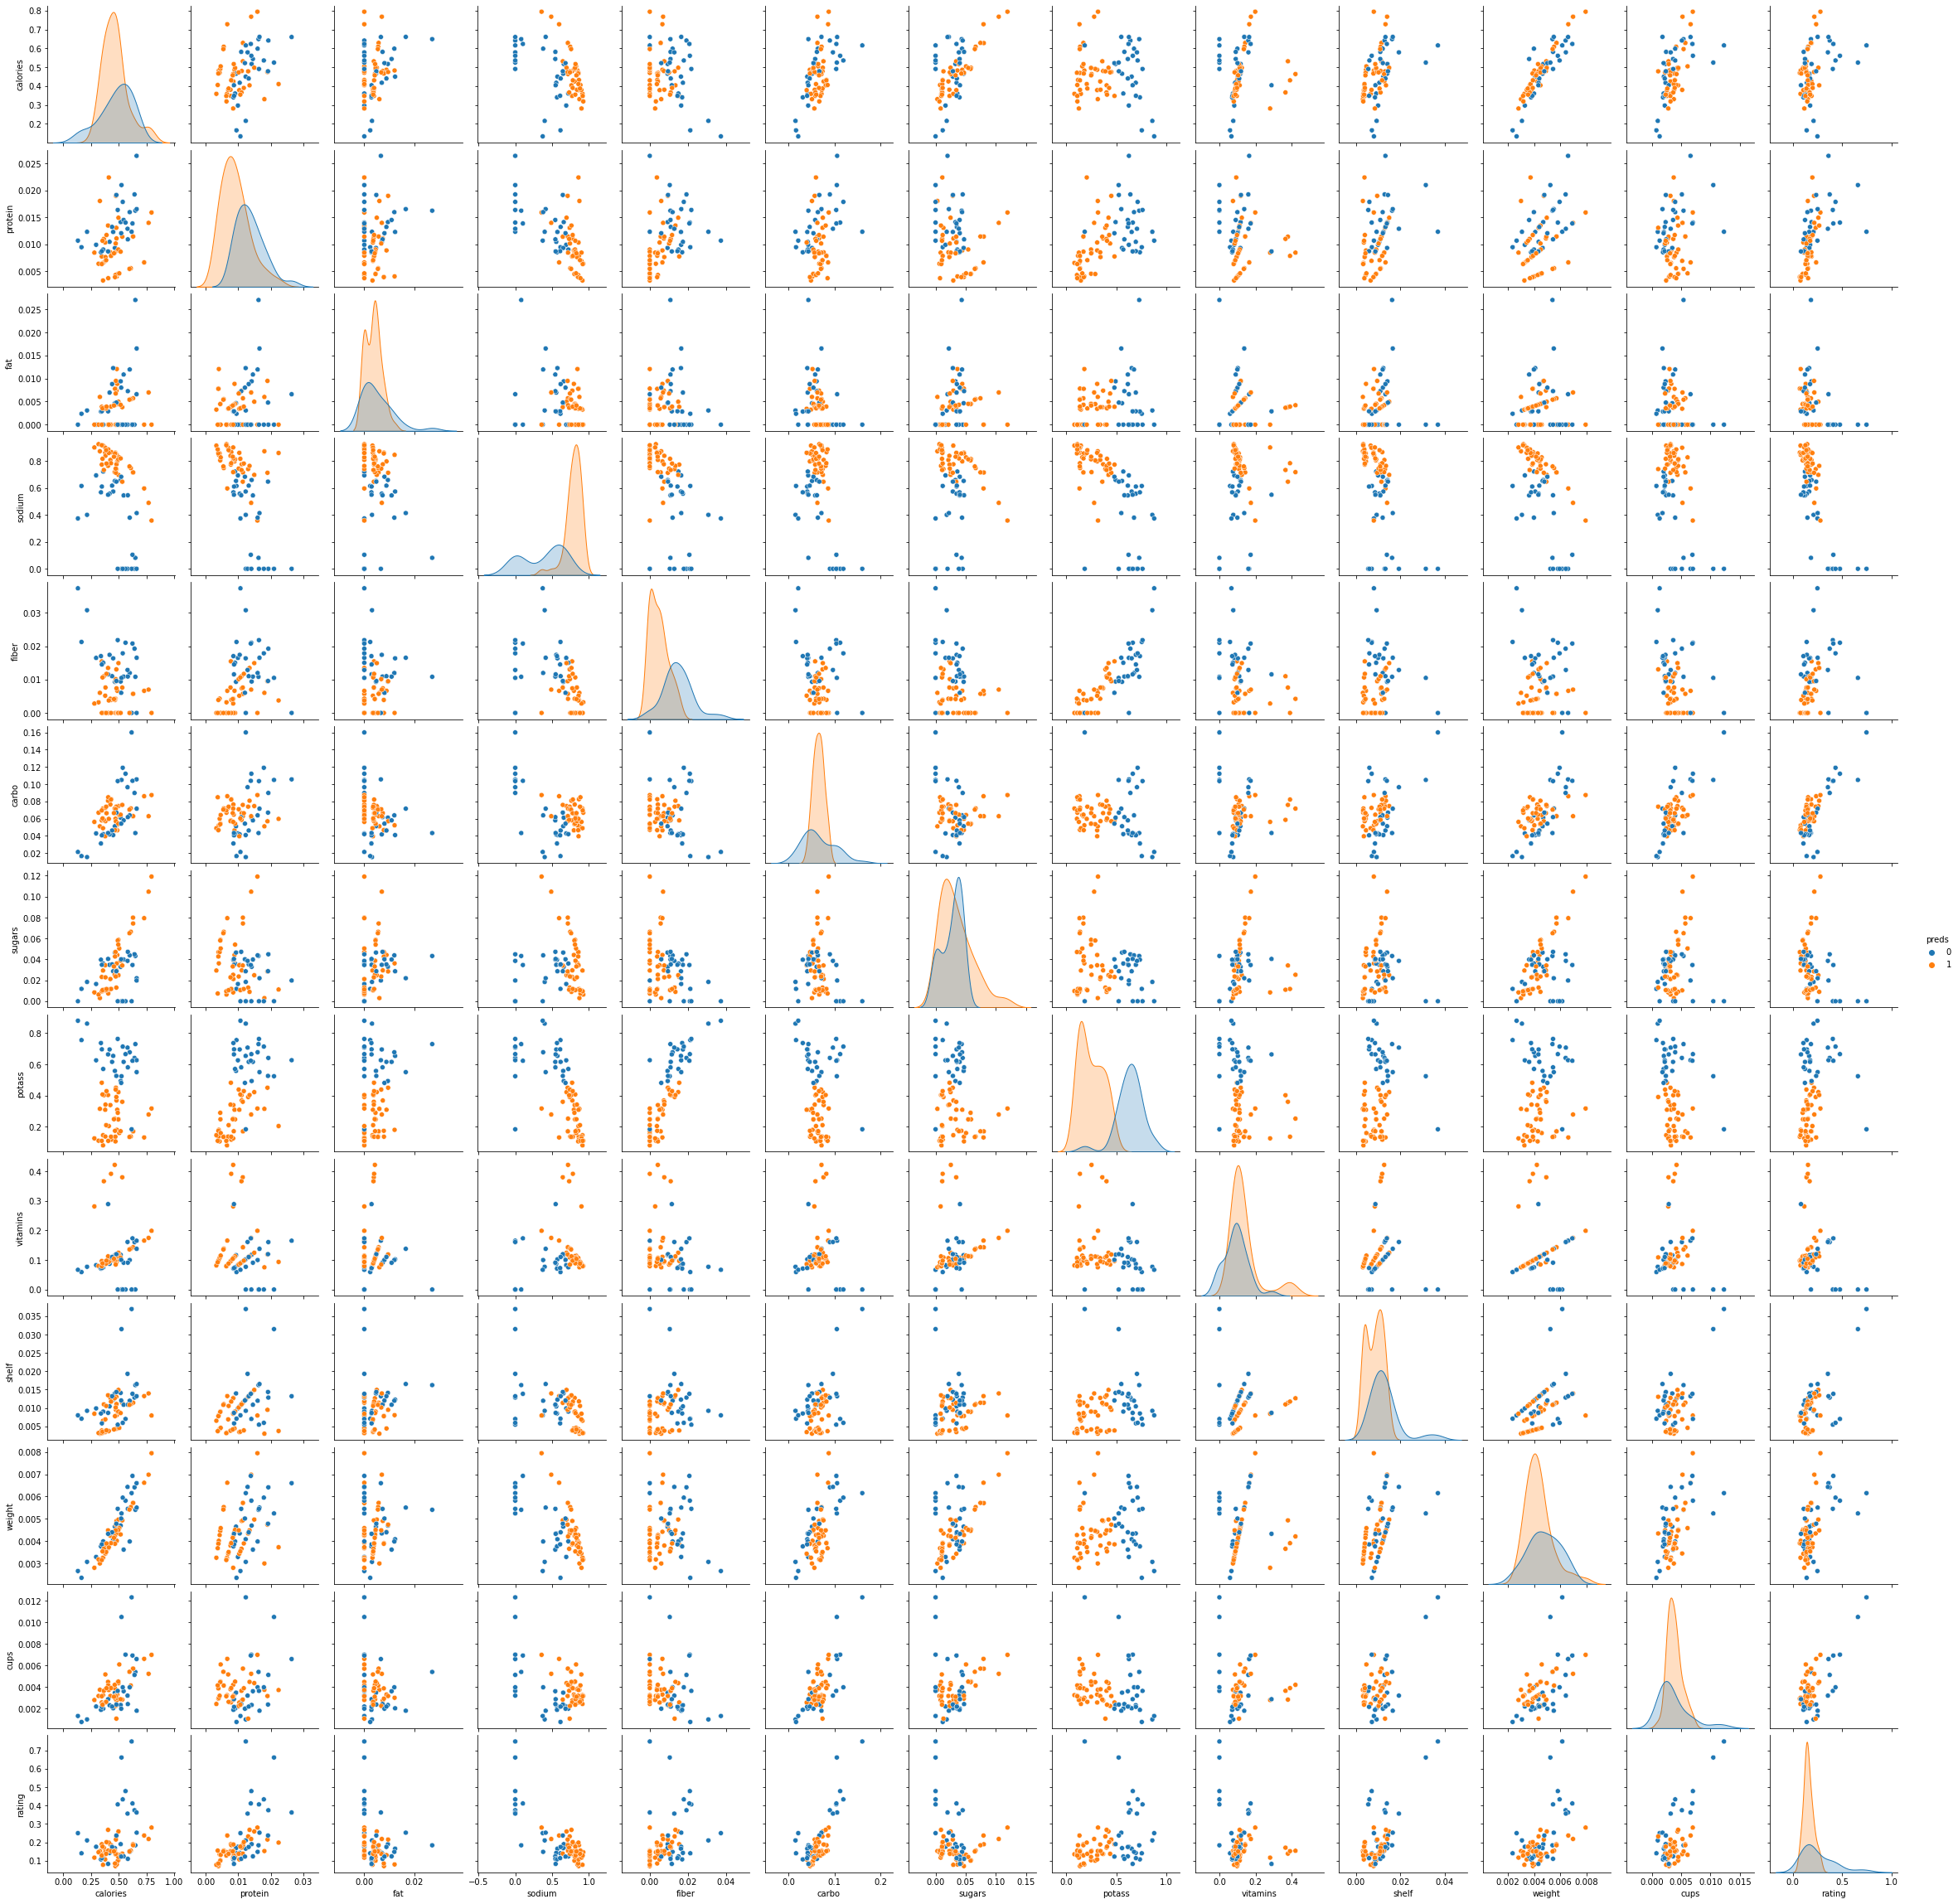

In [8]:
import seaborn as sns
sns.pairplot(data_scaled, hue='preds')

The same process can be applied with 3 clusters resulting in the following plot. This plot shows a few more relationships such as group 3 having higher calorie counts and overall higher ratings.

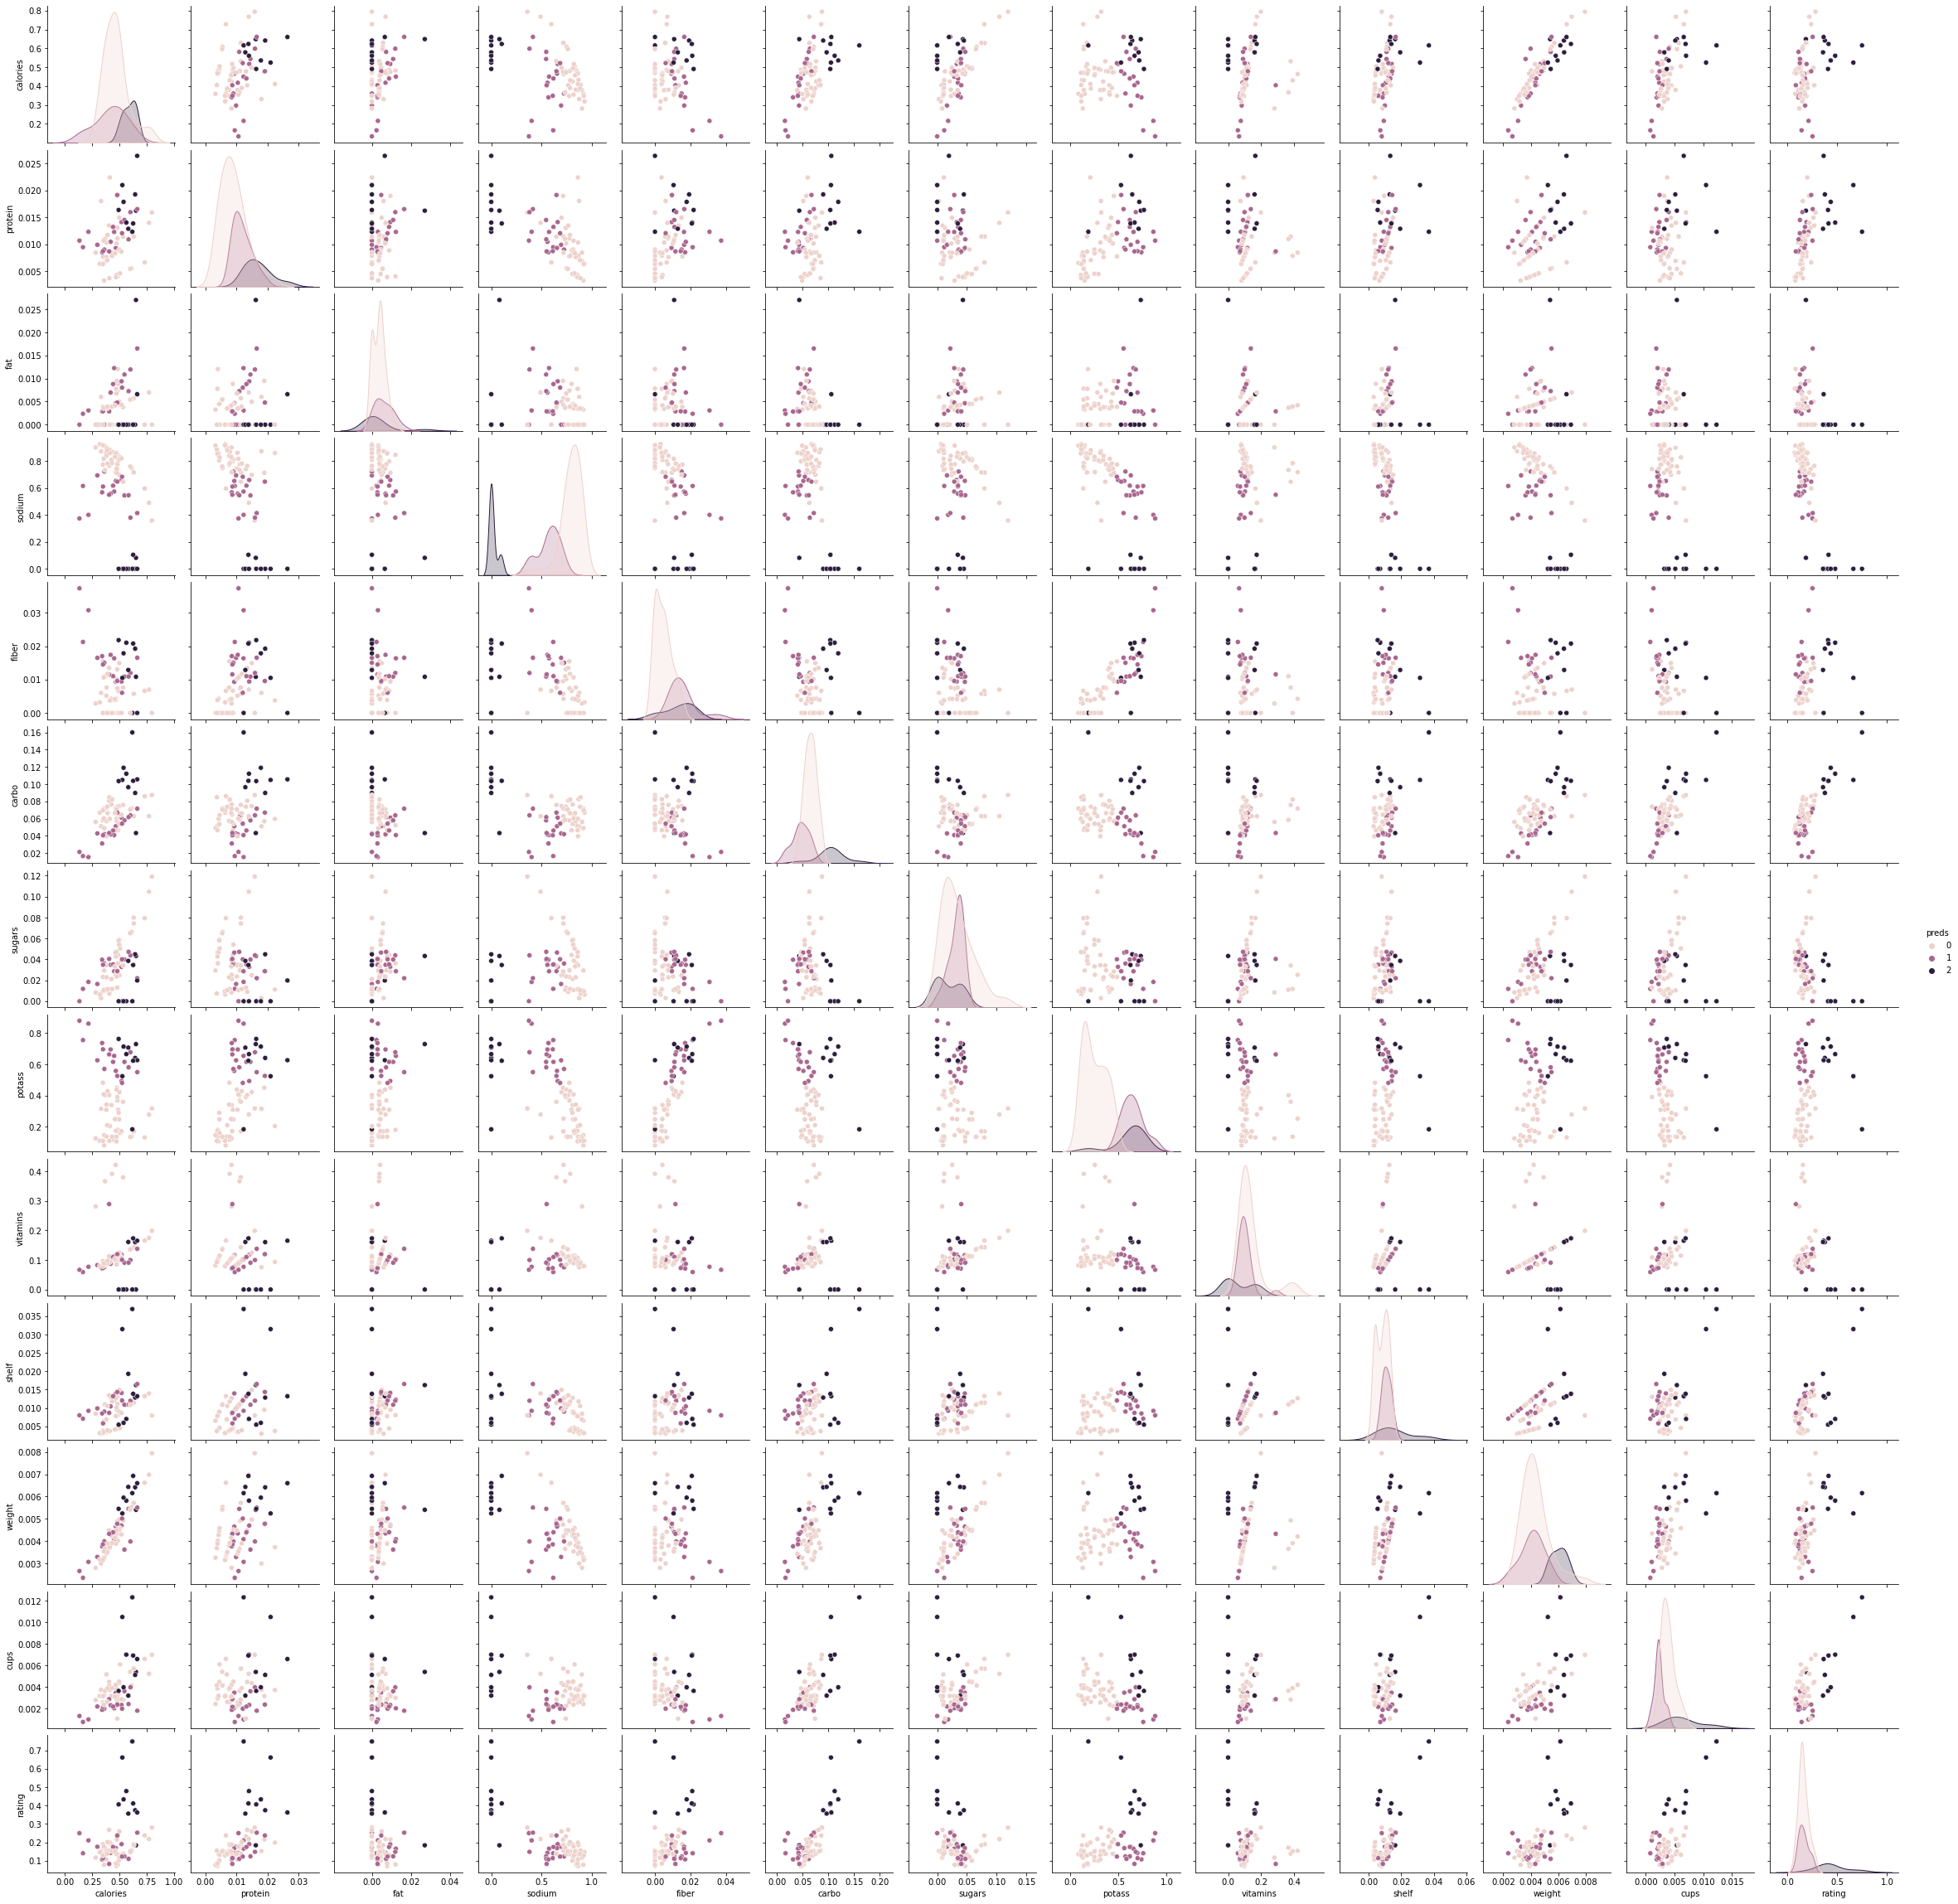

In [9]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
preds = cluster.fit_predict(data_scaled)

data_scaled['preds'] = preds
sns.pairplot(data_scaled, hue='preds')

In [13]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn.cluster import KMeans

This next section is very important. The dendrogram for each linkage method is plotted. The dendrogram will indicate how many groups are likely given the linkage method. I also compute the labels for all the training data and the silouette score. The silouette score will indicate the average distance between the groups. A higher sillouette indicates that the clusters are better defined thus representing a better clustering performance.

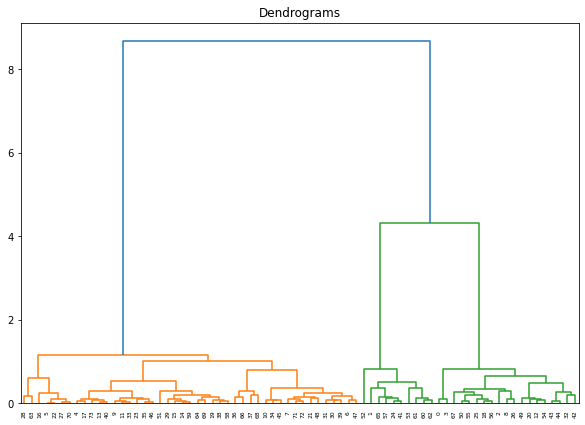

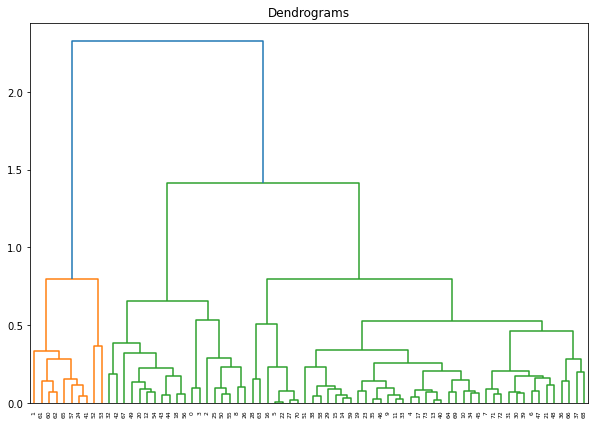

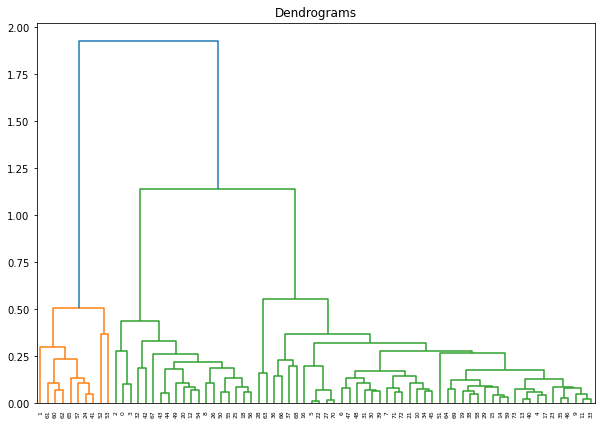

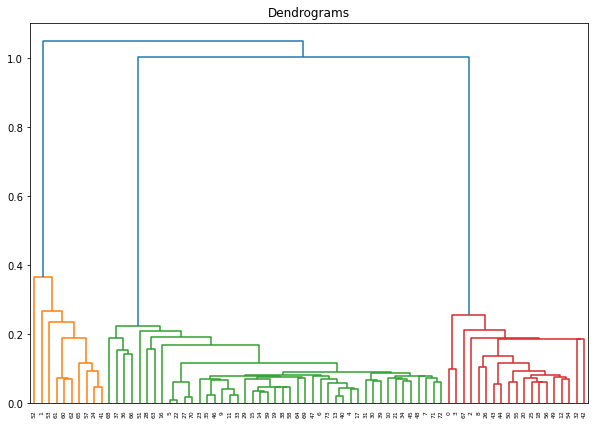

In [23]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
dendW = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
preds = cluster.fit_predict(data_scaled)
wardScore = metrics.silhouette_score(data_scaled, cluster.labels_, metric='euclidean')


plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
dendC = shc.dendrogram(shc.linkage(data_scaled, method='complete'))
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
preds = cluster.fit_predict(data_scaled)
completeScore = metrics.silhouette_score(data_scaled, cluster.labels_, metric='euclidean')

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
dendA = shc.dendrogram(shc.linkage(data_scaled, method='average'))
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
preds = cluster.fit_predict(data_scaled)
averageScore = metrics.silhouette_score(data_scaled, cluster.labels_, metric='euclidean')

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
dendS = shc.dendrogram(shc.linkage(data_scaled, method='single'))
#The dendrogram for single linkage suggests 3 clusters
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')  
preds = cluster.fit_predict(data_scaled)
singleScore = metrics.silhouette_score(data_scaled, cluster.labels_, metric='euclidean')

I also applied kmeans clustering.

In [24]:
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(data_scaled)
labels = kmeans_model.labels_
kmeansScore = metrics.silhouette_score(data_scaled, labels, metric='euclidean')

Here we can see different sillouette scores. The higher the better.

In [25]:
print("Ward: {}".format(wardScore))
print("Complete: {}".format(completeScore))
print("Average: {}".format(averageScore))
print("Single: {}".format(singleScore))
print("Kmeans: {}".format(kmeansScore))

Ward: 0.6883902158174161
Complete: 0.6424298307322445
Average: 0.6424298307322445
Single: 0.7495027436585414
Kmeans: 0.7495027436585414


From the results of the sillouette analysis Kmeans resulted in the best model, single linkage also preformed ideally. 

I also tried clustering various number of clusters using single linkage. The results of using sillouette confirm the 3 groups. 

In [28]:
for i in range(2,10):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single')  
    preds = cluster.fit_predict(data_scaled)
    print('Score for Clusters {}: {}'.format(str(i), metrics.silhouette_score(data_scaled, cluster.labels_, metric='euclidean')))

Score for Clusters 2: 0.6424298307322445
Score for Clusters 3: 0.7495027436585414
Score for Clusters 4: 0.7186412168951204
Score for Clusters 5: 0.6791800730557073
Score for Clusters 6: 0.6093236019112914
Score for Clusters 7: 0.6128152089510303
Score for Clusters 8: 0.3515608552061411
Score for Clusters 9: 0.2789035185167402


Thus using single linkage I would choose 3 clusters as this provides the highest degree of seperation between the clusters.

I split the data into 60/40 split. For partition testing.

In [32]:
import math
x_train = data_scaled[0:math.floor(len(data_scaled)*.6)]
x_test = data_scaled[math.floor(len(data_scaled)*.6):]

Here I trained the clustering algorithm on the training data. Then assigned the test data to the nearest centroid.

In [43]:
from sklearn.neighbors import NearestCentroid
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')  
predsTrain = cluster.fit_predict(x_train)

clf = NearestCentroid()
clf.fit(x_train, predsTrain)
y_test = clf.predict(x_test)

pred = np.concatenate((predsTrain, y_test), axis=0)

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')  
actual = cluster.fit_predict(data_scaled)

In [44]:
y_test

array([2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 0], dtype=int64)

We can compare the partitioned data and the full data using a confusion matrix, where the full data acts like the true data and the partition data as the predicted data.

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(actual,pred)

array([[ 0, 10,  0],
       [45,  0,  0],
       [ 0,  0, 19]], dtype=int64)

Here we can see that there are a few miss classifications. Specifically 45 instances where group 2 data being misclassified as group 1 as can be seen in the second row first column.

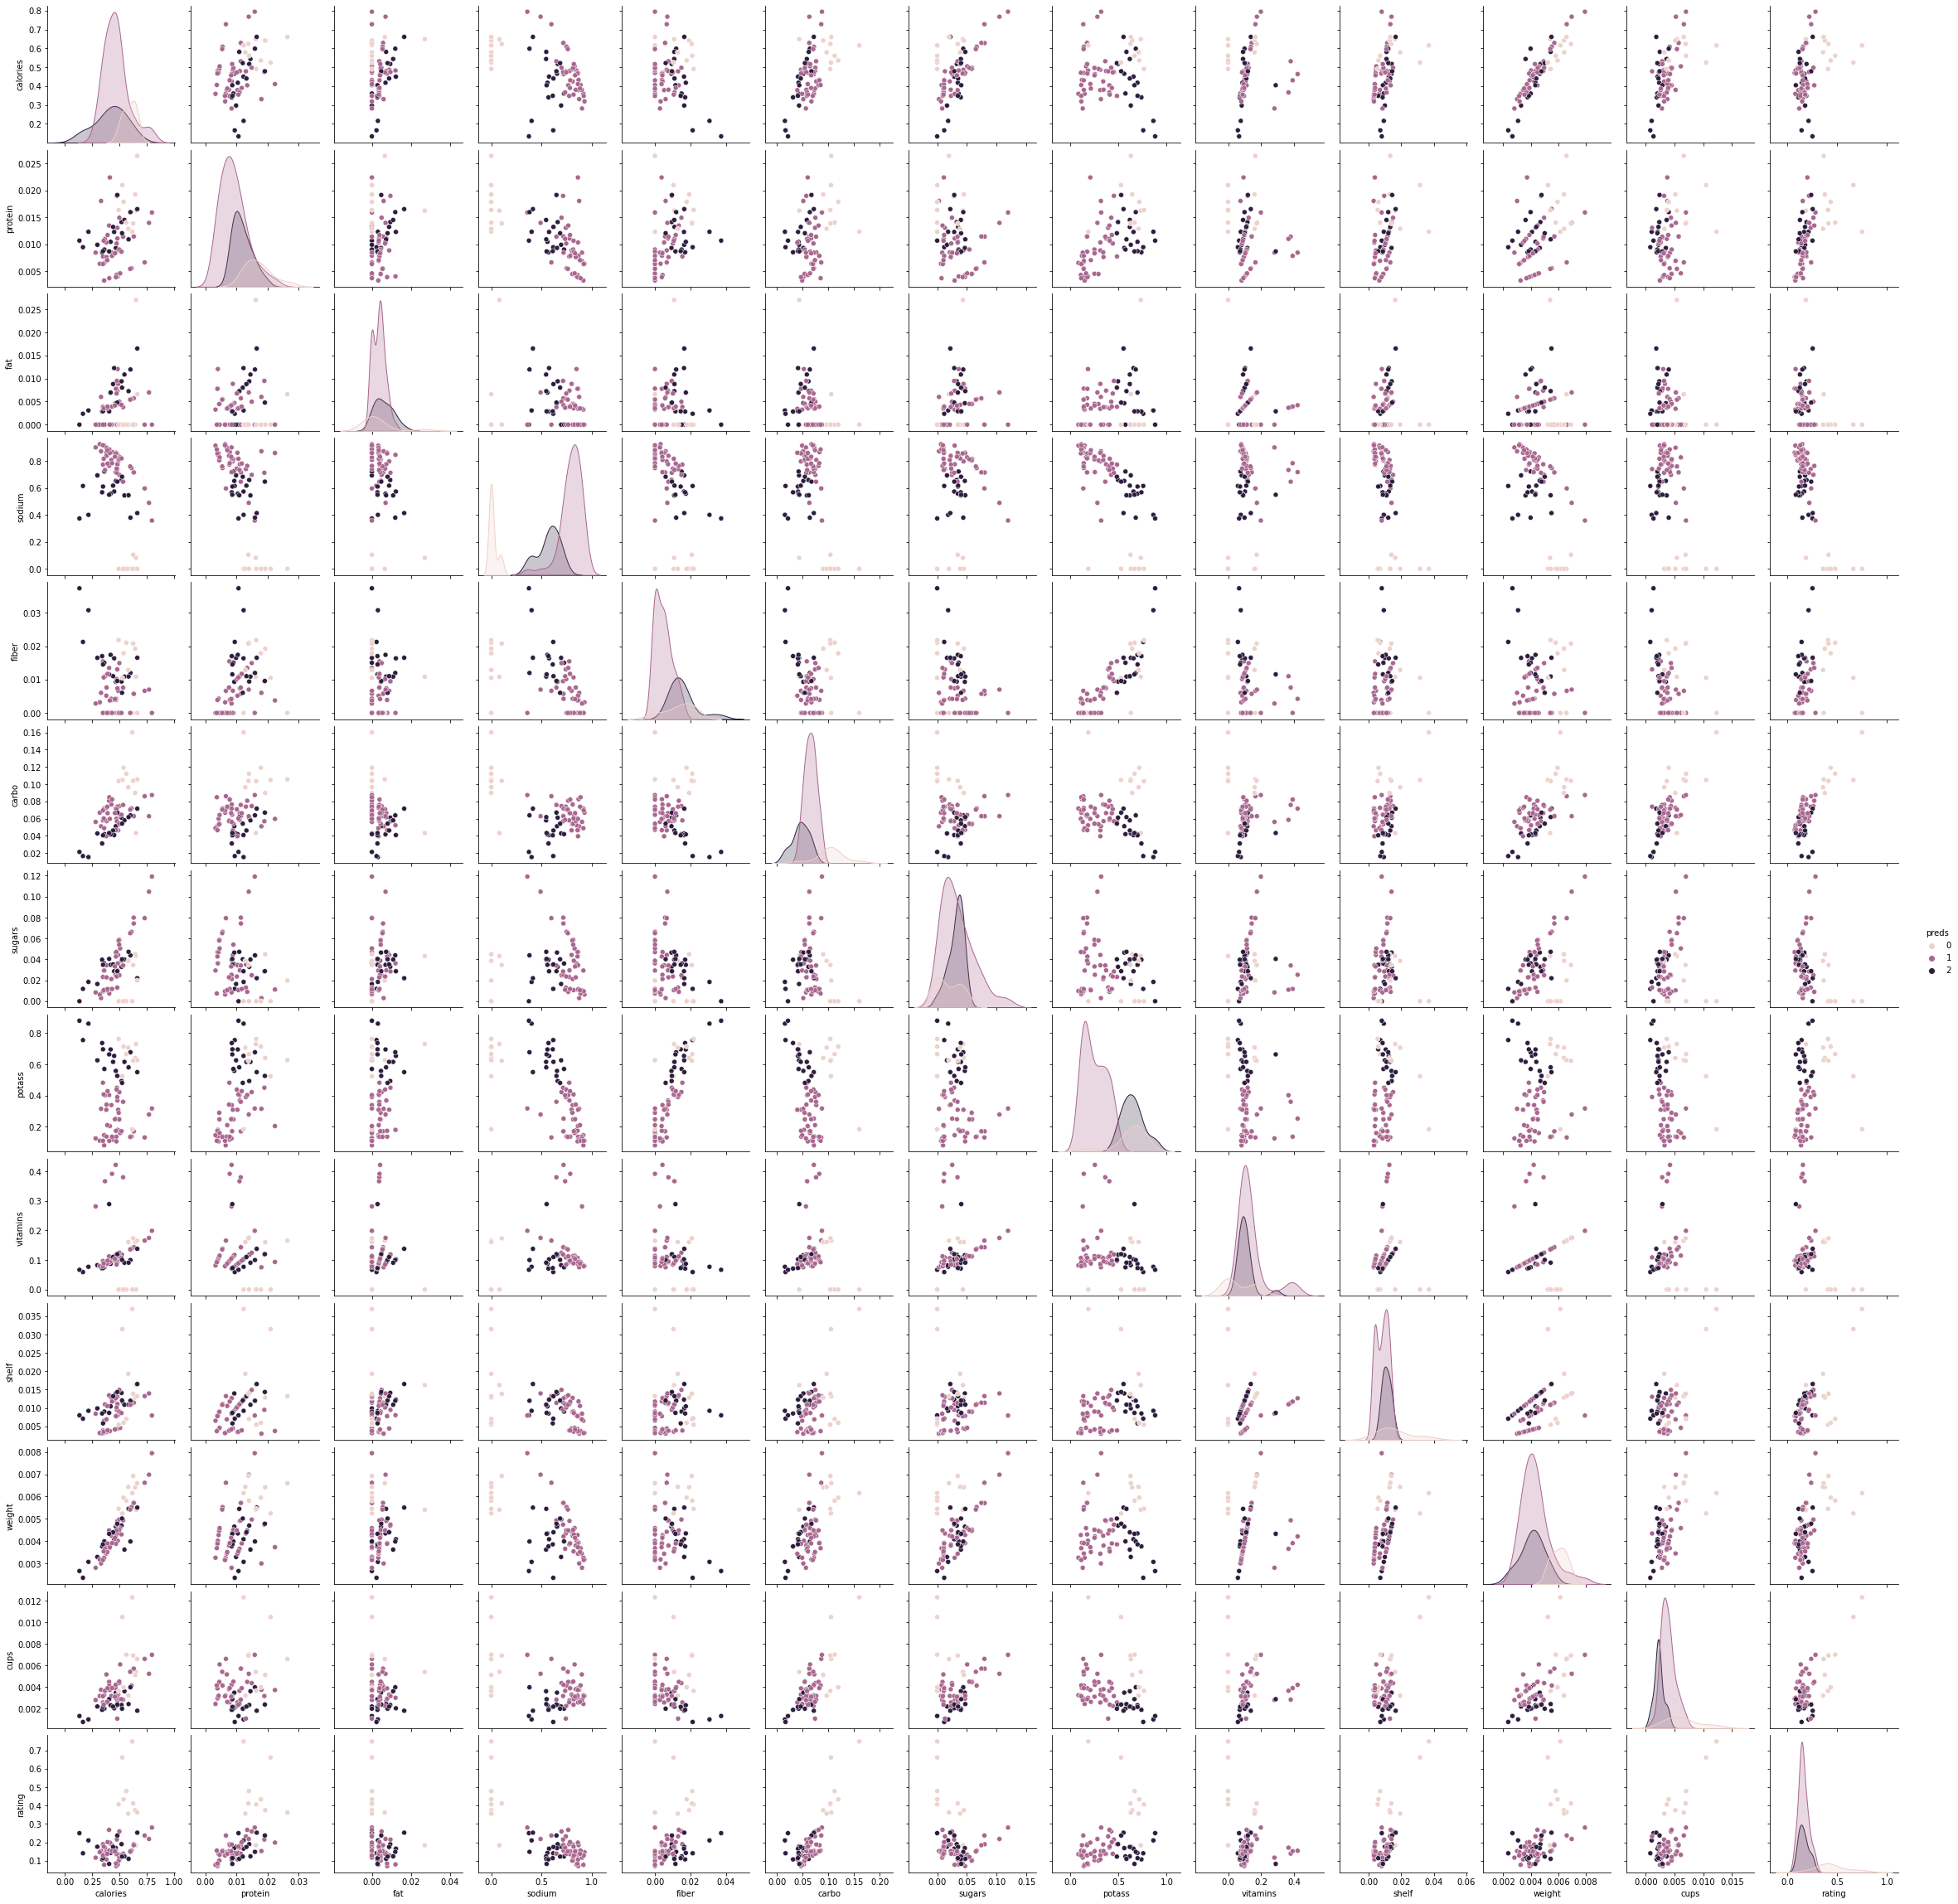

In [46]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')  
preds = cluster.fit_predict(data_scaled)

data_scaled['preds'] = preds
sns.pairplot(data_scaled, hue='preds')

Using the data from above it looks like the healthiest cereal choice is group 3 (Dark Purple / Cluster 2). That group has higher potassium, lower sodium than group 2, and potentially lower calories in a few of the coices. The data should be normailzed to make sure that all the cereal is on the same scale when compairing, especially when the variables are using different units and scales for measurement.

Here is a compairison of various clustering algorithms. https://scikit-learn.org/stable/modules/clustering.html
The clear distinction between hierarchical clustering and kmeans is the conectivity in the group. The cicrle pattern and the wave patterns above are correctly classified using hierarchical. Where as kmeans clusering focuses solely on the distance between the points.